<a href="https://colab.research.google.com/github/kavyakapoor200/recommendation-system/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd

# Load the CSV files into DataFrames
events_df = pd.read_csv('events.csv')
item_properties_df = pd.read_csv('item_properties.csv')
category_tree_df = pd.read_csv('category_tree.csv')

# Display the first few rows of each DataFrame
print("Events DataFrame:")
print(events_df.head())

print("\nItem Properties DataFrame:")
print(item_properties_df.head())

print("\nCategory Tree DataFrame:")
print(category_tree_df.head())


Events DataFrame:
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN

Item Properties DataFrame:
       timestamp    itemid    property                            value
0  1435460400000  460429.0  categoryid                             1338
1  1441508400000  206783.0         888          1116713 960601 n277.200
2  1439089200000  395014.0         400  n552.000 639502 n720.000 424566
3  1431226800000   59481.0         790                       n15360.000
4  1431831600000  156781.0         917                           828513

Category Tree DataFrame:
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0


In [83]:
import pandas as pd

# Load the Events DataFrame
events_path = 'events.csv'
events_df = pd.read_csv(events_path)

# Convert the timestamp to a readable date-time format
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], unit='ms')
print(events_df['timestamp'].min(), events_df['timestamp'].max())


# Display the first few rows to verify the conversion
print("Events DataFrame after timestamp conversion:")
print(events_df.head())

# Check for missing values
print("\nMissing values in Events DataFrame:")
print(events_df.isnull().sum())

# Handle missing values (Example: Dropping rows with missing values)
events_df.dropna(inplace=True)

# Display the shape of the DataFrame after dropping missing values
print("\nShape of Events DataFrame after dropping missing values:")
print(events_df.shape)

print(events_df['event'].value_counts())

# Check for missing values in the events DataFrame
print(events_df.isnull().sum())

# Check for unique values in the 'event' column
print(events_df['event'].unique())



events_df.to_csv('cleaned_events.csv', index=False)



2015-06-01 06:00:09.198000 2015-06-23 05:59:10.226000
Events DataFrame after timestamp conversion:
                timestamp  visitorid event  itemid  transactionid
0 2015-06-02 05:02:12.117     257597  view  355908            NaN
1 2015-06-02 05:50:14.164     992329  view  248676            NaN
2 2015-06-02 05:13:19.827     111016  view  318965            NaN
3 2015-06-02 05:12:35.914     483717  view  253185            NaN
4 2015-06-02 05:02:17.106     951259  view  367447            NaN

Missing values in Events DataFrame:
timestamp             0
visitorid             0
event                 0
itemid                0
transactionid    425872
dtype: int64

Shape of Events DataFrame after dropping missing values:
(3504, 5)
event
transaction    3504
Name: count, dtype: int64
timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
dtype: int64
['transaction']


In [84]:
# Load the Item Properties DataFrame
item_properties_path = 'item_properties.csv'
item_properties_df = pd.read_csv(item_properties_path)

# Convert the timestamp to a readable date-time format
item_properties_df['timestamp'] = pd.to_datetime(item_properties_df['timestamp'], unit='ms')
print(events_df['timestamp'].min(), events_df['timestamp'].max())

# Display the first few rows to verify the conversion
print("Item Properties DataFrame after timestamp conversion:")
print(item_properties_df.head())

# Check for missing values
print("\nMissing values in Item Properties DataFrame:")
print(item_properties_df.isnull().sum())

# Handle missing values (Example: Dropping rows with missing values)
item_properties_df.dropna(inplace=True)

# Display the shape of the DataFrame after dropping missing values
print("\nShape of Item Properties DataFrame after dropping missing values:")
print(item_properties_df.shape)

print(item_properties_df['itemid'].nunique())
print(item_properties_df['property'].value_counts())


2015-06-01 06:16:28.863000 2015-06-23 03:20:18.362000
Item Properties DataFrame after timestamp conversion:
            timestamp    itemid    property                            value
0 2015-06-28 03:00:00  460429.0  categoryid                             1338
1 2015-09-06 03:00:00  206783.0         888          1116713 960601 n277.200
2 2015-08-09 03:00:00  395014.0         400  n552.000 639502 n720.000 424566
3 2015-05-10 03:00:00   59481.0         790                       n15360.000
4 2015-05-17 03:00:00  156781.0         917                           828513

Missing values in Item Properties DataFrame:
timestamp    0
itemid       1
property     1
value        1
dtype: int64

Shape of Item Properties DataFrame after dropping missing values:
(255794, 4)
174099
property
888           37818
790           22757
available     18843
categoryid     9928
6              8088
              ...  
190               1
843               1
812               1
426               1
718             

In [85]:
# Load the Category Tree DataFrame
category_tree_path = 'category_tree.csv'
category_tree_df = pd.read_csv(category_tree_path)

# Display the first few rows to understand the structure
print("Category Tree DataFrame:")
print(category_tree_df.head())

# Check for missing values
print("\nMissing values in Category Tree DataFrame:")
print(category_tree_df.isnull().sum())

# Handle missing values (Example: Dropping rows with missing values)
category_tree_df.dropna(inplace=True)

# Display the shape of the DataFrame after dropping missing values
print("\nShape of Category Tree DataFrame after dropping missing values:")
print(category_tree_df.shape)


Category Tree DataFrame:
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0

Missing values in Category Tree DataFrame:
categoryid     0
parentid      25
dtype: int64

Shape of Category Tree DataFrame after dropping missing values:
(1644, 2)


In [86]:
# Load the Item Properties DataFrame
item_properties_path = 'item_properties.csv'
item_properties_df = pd.read_csv(item_properties_path)

# Ensure 'property' column exists
if 'property' in item_properties_df.columns:
    # Filter out non-numeric values in 'property' column
    item_properties_df = item_properties_df[pd.to_numeric(item_properties_df['property'], errors='coerce').notnull()]

    # Convert the 'property' column to int64
    item_properties_df['property'] = item_properties_df['property'].astype('int64')
else:
    raise KeyError("'property' column not found in item_properties_df")

# Verify the conversion
print("Data types in item_properties_df:")
print(item_properties_df.dtypes)

# Ensure 'itemid' exists in events_df and item_properties_df
if 'itemid' in events_df.columns and 'itemid' in item_properties_df.columns:
    # Merge events_df with item_properties_df on 'itemid'
    merged_df = pd.merge(events_df, item_properties_df, on='itemid', how='left')
else:
    raise KeyError("'itemid' column not found in one or both DataFrames (events_df or item_properties_df)")

# Ensure 'categoryid' exists in category_tree_df and 'property' exists in merged_df
if 'categoryid' in category_tree_df.columns and 'property' in merged_df.columns:
    # Merge the result with category_tree_df on 'property' and 'categoryid'
    final_df = pd.merge(merged_df, category_tree_df, left_on='property', right_on='categoryid', how='left')
else:
    raise KeyError("'categoryid' column not found in category_tree_df or 'property' not found in merged_df")

# Display the first few rows of the integrated DataFrame
print("Integrated DataFrame:")
print(final_df.head())

# Specify the file name and path where you want to save the CSV
output_file = 'final_df.csv'

# Save the DataFrame to a CSV file
final_df.to_csv(output_file, index=False)

print(f"DataFrame saved to {output_file}")



Data types in item_properties_df:
timestamp      int64
itemid       float64
property       int64
value         object
dtype: object
Integrated DataFrame:
              timestamp_x  visitorid        event  itemid  transactionid  \
0 2015-06-02 05:17:56.276     599528  transaction  356475         4000.0   
1 2015-06-01 21:18:20.981     121688  transaction   15335        11117.0   
2 2015-06-01 21:25:15.008     552148  transaction   81345         5444.0   
3 2015-06-01 16:38:56.375     102019  transaction  150318        13556.0   
4 2015-06-01 16:38:56.375     102019  transaction  150318        13556.0   

    timestamp_y  property                          value  categoryid  parentid  
0           NaN       NaN                            NaN         NaN       NaN  
1           NaN       NaN                            NaN         NaN       NaN  
2           NaN       NaN                            NaN         NaN       NaN  
3  1.441508e+12     790.0                     n67080.000       79

<ipython-input-86-cd2e69e07212>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_properties_df['property'] = item_properties_df['property'].astype('int64')


In [87]:
# Basic statistics of the integrated DataFrame
print("Summary Statistics of Integrated DataFrame:")
print(final_df.describe())


Summary Statistics of Integrated DataFrame:
                         timestamp_x     visitorid         itemid  \
count                           4444  4.444000e+03    4444.000000   
mean   2015-06-11 21:29:56.883651840  7.066258e+05  238875.877138   
min       2015-06-01 06:16:28.863000  5.390000e+02      25.000000   
25%    2015-06-05 23:01:01.947500032  3.545540e+05  120007.750000   
50%    2015-06-11 20:16:56.940999936  7.301880e+05  245400.000000   
75%    2015-06-17 06:48:45.988499968  1.088322e+06  360340.750000   
max       2015-06-23 03:20:18.362000  1.406787e+06  466614.000000   
std                              NaN  4.031256e+05  135843.697107   

       transactionid   timestamp_y     property   categoryid     parentid  
count    4444.000000  2.598000e+03  2598.000000  2567.000000  2567.000000  
mean     8960.848335  1.435710e+12   654.070824   655.046358  1010.755356  
min         0.000000  1.431227e+12     0.000000     0.000000     8.000000  
25%      4481.250000  1.433041


Distribution of Events:
event
transaction    4444
Name: count, dtype: int64


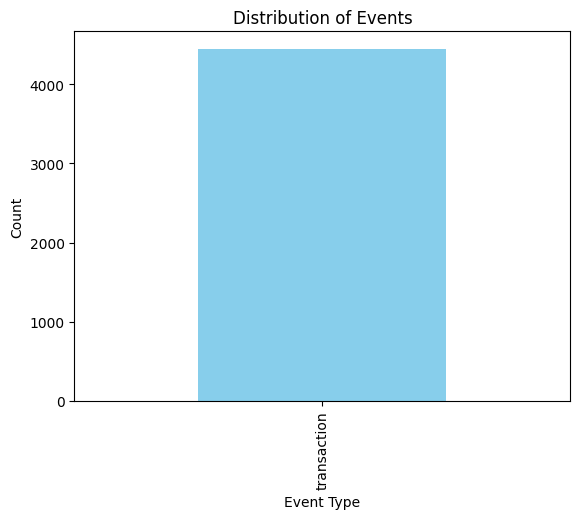

In [88]:
# Distribution of different types of events
event_counts = final_df['event'].value_counts()
print("\nDistribution of Events:")
print(event_counts)

# Visualize the distribution of events
import matplotlib.pyplot as plt

event_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Distribution of Events')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()


In [89]:
import pandas as pd

# Load the dataset
file_path = 'final_df.csv'  # Adjust to the correct file path
final_df = pd.read_csv(file_path)
print(final_df.shape)

# Check for missing values
print("Missing values:", final_df.isnull().sum())
#drop the missing values
final_df.dropna(inplace=True)
#the final shape of final.df
print("\nShape of final_df after dropping missing values:")
print(final_df.shape)

print("Missing values:", final_df.isnull().sum())






(4444, 10)
Missing values: timestamp_x         0
visitorid           0
event               0
itemid              0
transactionid       0
timestamp_y      1846
property         1846
value            1846
categoryid       1877
parentid         1877
dtype: int64

Shape of final_df after dropping missing values:
(2567, 10)
Missing values: timestamp_x      0
visitorid        0
event            0
itemid           0
transactionid    0
timestamp_y      0
property         0
value            0
categoryid       0
parentid         0
dtype: int64


In [112]:
import pandas as pd

# Load the CSV file
file_path = '/content/final_df_a.csv'
final_df = pd.read_csv(file_path)

# Aggregate the data by summing interaction weights for each visitor and item
final_df = final_df.groupby(['visitorid', 'itemid'], as_index=False).agg({
    'interaction_weight': 'sum'
})

# Save the final table to a CSV file
output_path = '/content/final_df_a_aggregated.csv'
final_df.to_csv(output_path, index=False)

print(f"Aggregated data saved to '{output_path}'")


Aggregated data saved to '/content/final_df_a_aggregated.csv'


In [113]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

# Load your dataset
df = pd.read_csv('final_df_a_aggregated.csv')  # Adjust the file path as needed

# Create the interaction matrix (visitorid vs itemid)
interaction_matrix = pd.pivot_table(df, values='interaction_weight',
                                   index='visitorid', columns='itemid',
                                   aggfunc='sum', fill_value=0)

# Convert the interaction matrix to sparse format
sparse_matrix = coo_matrix(interaction_matrix.values)



In [114]:
from scipy.sparse.linalg import svds

# Ensure the sparse matrix is in float type
sparse_matrix = sparse_matrix.astype(float)

# Perform SVD
U, sigma, Vt = svds(sparse_matrix, k=100)  # You can adjust k for the rank of decomposition

# Convert sigma to a diagonal matrix
sigma = np.diag(sigma)

# Reconstruct the predicted matrix
predicted_matrix = np.dot(U, np.dot(sigma, Vt))

# Convert the predicted matrix back to a DataFrame
predicted_df = pd.DataFrame(predicted_matrix, columns=interaction_matrix.columns, index=interaction_matrix.index)


In [116]:
def get_top_n_recommendations(visitor_id, predicted_df, N=3):
    # Get the predicted ratings for the visitor
    visitor_predicted_ratings = predicted_df.loc[visitor_id].sort_values(ascending=False)

    # Get the top N recommended items
    top_n_items = visitor_predicted_ratings.head(N).index.tolist()

    return top_n_items

# Example: Get top 3 recommendations for visitor 57905 and for 172
visitor_id = 172
recommended_items = get_top_n_recommendations(visitor_id, predicted_df, N=3)
print(f"Top 3 recommended items for visitor {visitor_id}: {recommended_items}")


Top 3 recommended items for visitor 172: [369933.0, 465522.0, 51969.0]


In [117]:
from sklearn.metrics import precision_score, recall_score, f1_score

# List of items the user actually interacted with (ground truth)
# actual_interacted_items = [62275,138196,267416,338395,341009,428257,459583,288267]
actual_interacted_items = [10034,465522]

# List of items recommended by the system
#recommended_items = [428257.0, 341009.0, 338395.0]
recommended_items = [369933.0, 465522.0, 51969.0]

# Convert both lists to sets for easier comparison
actual_set = set(actual_interacted_items)
recommended_set = set(recommended_items)

# Calculate Precision
# True Positives = intersection of actual_interacted_items and recommended_items
tp = len(actual_set.intersection(recommended_set))
fp = len(recommended_set) - tp
precision = tp / (tp + fp) if tp + fp != 0 else 0

# Calculate Recall
# False Negatives = actual_interacted_items not in recommended_items
fn = len(actual_set) - tp
recall = tp / (tp + fn) if tp + fn != 0 else 0

# Calculate F1-Score
f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

# Calculate Hit Ratio
hit_ratio = 1 if tp > 0 else 0  # If at least one item was recommended, it counts as a hit

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Hit Ratio: {hit_ratio:.4f}")



Precision: 0.3333
Recall: 0.5000
F1-Score: 0.4000
Hit Ratio: 1.0000
